# AUTHOR NAME :- KIRAN VIJAY PATIL

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm,skew,kurtosis,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Import Dataset

In [2]:
data=pd.read_csv(r"C:\Users\ARJUN SALUNKHE\Documents\Kiran Patil\datasets\laptop.csv",encoding="latin-1")
data

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1316,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,638.00
1299,1317,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,1499.00
1300,1318,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,229.00
1301,1319,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,764.00


# Data Preprocessing

### Delete Unwanted data from Dataset

In [3]:
del (data["laptop_ID"])

### Finding Null values 

In [4]:
data.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

### Convert Raw data into meaningful data

In [5]:
data["Ram"]=data["Ram"].str.replace("GB","")
data["Weight"]=data["Weight"].str.replace("kg","")
data["Ram"]=data["Ram"].astype(int)
data["Weight"]=data["Weight"].astype(float)

## Label Encoding

### Convert String into numeric data

In [6]:
le=LabelEncoder()
data["Company"]=le.fit_transform(data["Company"])
data["Product"]=le.fit_transform(data["Product"])
data["TypeName"]=le.fit_transform(data["TypeName"])
data["ScreenResolution"]=le.fit_transform(data["ScreenResolution"])
data["Cpu"]=le.fit_transform(data["Cpu"])
data["Memory"]=le.fit_transform(data["Memory"])
data["Gpu"]=le.fit_transform(data["Gpu"])
data["OpSys"]=le.fit_transform(data["OpSys"])

# Exploratory Data Analysis (EDA)

In [7]:
# Find out the basic statistical measurements of the data.
data.describe()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,6.442824,308.207214,2.582502,15.017191,9.224098,76.983883,8.382195,16.345357,54.682272,4.808903,2.038734,1123.686992
std,4.084128,171.887833,1.245231,1.426304,7.885050,25.190467,5.084665,8.008281,21.623195,1.035253,0.665475,699.009043
min,0.000000,0.000000,0.000000,10.100000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.690000,174.000000
25%,4.000000,182.500000,1.500000,14.000000,6.000000,65.000000,4.000000,10.000000,46.000000,5.000000,1.500000,599.000000
50%,7.000000,291.000000,3.000000,15.600000,8.000000,78.000000,8.000000,16.000000,53.000000,5.000000,2.040000,977.000000
75%,10.000000,455.500000,3.000000,15.600000,15.000000,97.000000,8.000000,23.000000,72.000000,5.000000,2.300000,1487.880000
max,18.000000,617.000000,5.000000,18.400000,39.000000,117.000000,64.000000,38.000000,109.000000,8.000000,4.700000,6099.000000


### Correlation

<AxesSubplot:>

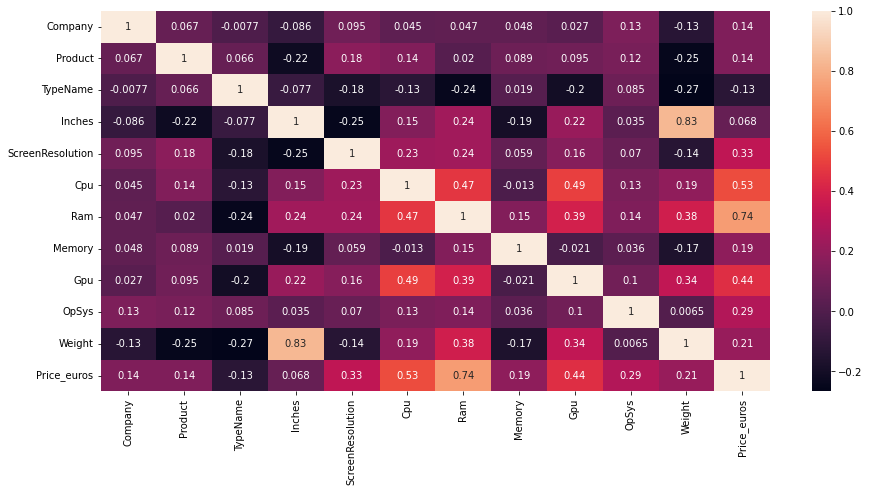

In [8]:
cor=data.corr()
plt.figure(figsize=(15,7))
sns.heatmap(cor,annot=True,fmt=".2g")

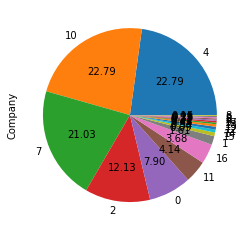

In [9]:
data["Company"].value_counts().plot(kind="pie",autopct="%1.2f")
plt.show()

* Dell , Lenovo  And HP laptops are most used by peoples.

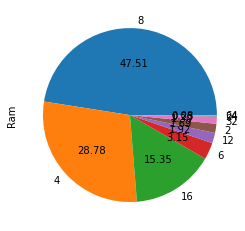

In [10]:
data["Ram"].value_counts().plot(kind="pie",autopct="%1.2f")
plt.show()

* The laptop which has 8GB Ram is most used by peoples.

In [11]:
data.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,300,4,13.3,23,65,8,4,58,8,1.37,1339.69
1,1,301,4,13.3,1,63,8,2,51,8,1.34,898.94
2,7,50,3,15.6,8,74,8,16,53,4,1.86,575.00
3,1,300,4,15.4,25,85,16,29,9,8,1.83,2537.45
4,1,300,4,13.3,23,67,8,16,59,8,1.37,1803.60


* Convert all independent data into one level because in our data set we have some categorical,some continuous data so we need to convert them into one level.

## Check outliers for each column

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Company'>

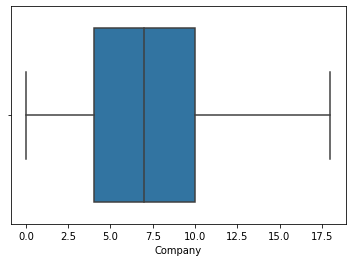

In [12]:
sns.boxplot(data["Company"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product'>

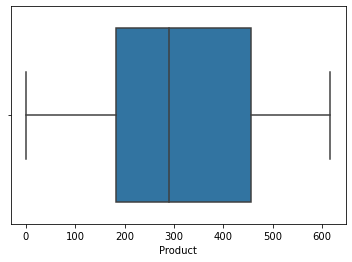

In [13]:
sns.boxplot(data["Product"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TypeName'>

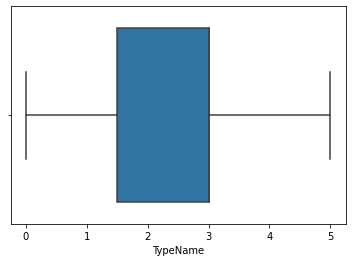

In [14]:
sns.boxplot(data["TypeName"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Inches'>

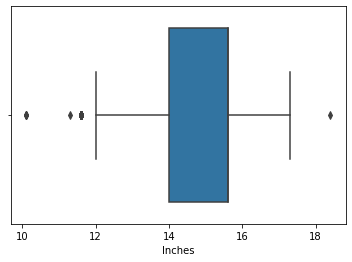

In [15]:
sns.boxplot(data["Inches"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ScreenResolution'>

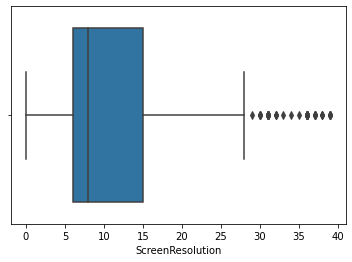

In [16]:
sns.boxplot(data["ScreenResolution"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cpu'>

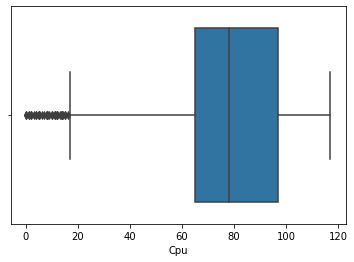

In [17]:
sns.boxplot(data["Cpu"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gpu'>

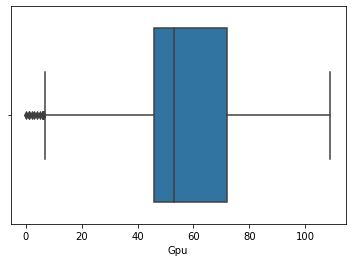

In [18]:
sns.boxplot(data["Gpu"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

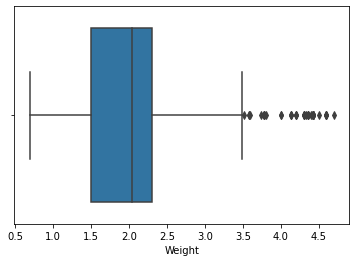

In [19]:
sns.boxplot(data["Weight"])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Price_euros'>

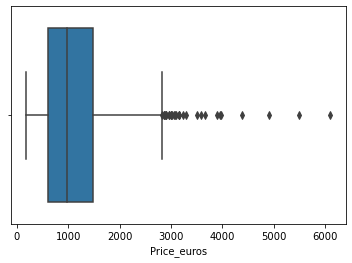

In [20]:
sns.boxplot(data["Price_euros"])

# Data Normalization

## Independent data normalization

* Above graph shows in our dataset we have an too much outliers ...so we need to use Robust scaler for data normalization

In [21]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [22]:
sc=RobustScaler()
SS=sc.fit_transform(x)

In [23]:
kp=pd.DataFrame(SS)
kp

,0,1,2,3,4,5,6,7,8,9,10
0,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.40625,0.0,-0.923077,0.192308,3.0,-0.8375
1,-1.000000,0.036630,0.666667,-1.4375,-0.777778,-0.46875,0.0,-1.076923,-0.076923,3.0,-0.8750
2,0.000000,-0.882784,0.000000,0.0000,0.000000,-0.12500,0.0,0.000000,0.000000,-1.0,-0.2250
3,-1.000000,0.032967,0.666667,-0.1250,1.888889,0.21875,2.0,1.000000,-1.692308,3.0,-0.2625
4,-1.000000,0.032967,0.666667,-1.4375,1.666667,-0.34375,0.0,0.000000,0.230769,3.0,-0.8375
...,...,...,...,...,...,...,...,...,...,...,...
1298,0.500000,1.058608,-2.000000,-1.0000,0.555556,0.34375,-1.0,-0.923077,-0.230769,0.0,-0.3000
1299,0.500000,1.087912,-2.000000,-1.4375,1.222222,0.34375,2.0,1.000000,-0.230769,0.0,-0.9250
1300,0.500000,-0.347985,0.000000,-1.0000,-0.888889,-1.37500,-1.5,1.461538,-0.500000,0.0,-0.6750
1301,0.000000,-1.058608,0.000000,0.0000,-0.888889,0.34375,-0.5,-0.461538,-1.230769,0.0,0.1875


## Normalization of dependent column

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


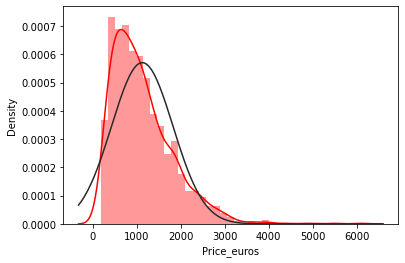

In [24]:
sns.distplot(a=data["Price_euros"],fit=norm,color="red")
plt.show()

## To convert the target value into normal data we have 3 methods 
* 1) Log transformation
* 2) Square root Transformation
* 3) Box-Cox transformation

# 1) Log transformation

In [25]:
trs_data=np.log(data["Price_euros"])

In [26]:
skew(trs_data)

-0.17392921328627067

In [27]:
kurtosis(trs_data,fisher=False)

2.531745334197979

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

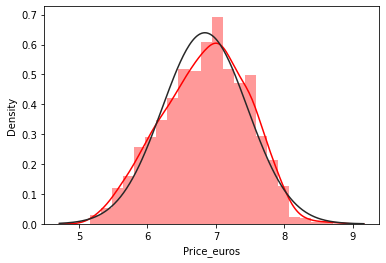

In [28]:
sns.distplot(a=trs_data,fit=norm,color="red")

# 2) SQRT transformation

In [29]:
trs_data1=np.sqrt(data["Price_euros"])

In [30]:
skew(trs_data1)

0.5676354128116943

In [31]:
kurtosis(trs_data1,fisher=False)

3.2904228206401305

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price_euros', ylabel='Density'>

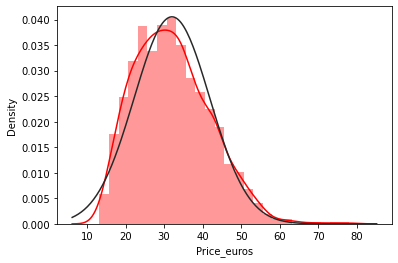

In [32]:
sns.distplot(a=trs_data1,fit=norm,color="red")

# 3) Box_cox transformation

In [33]:
trs_data2=boxcox(data["Price_euros"],lmbda=0)

In [34]:
skew(trs_data2)

-0.17392921328627067

In [35]:
kurtosis(trs_data2,fisher=False)

2.531745334197979

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

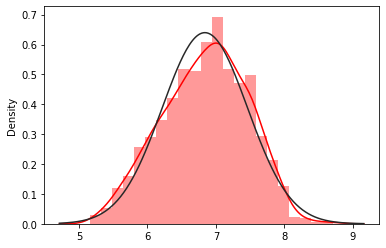

In [36]:
sns.distplot(a=trs_data2,fit=norm,color="red")

* Here we convert Non Gaussian data into normal for the making predictions. by using 3 different methods but BOX-Cox method gives us best gaussian data for target value.

# Feature Selection

## Select normalized data to make predictions. 

In [37]:
X=SS
Y=trs_data2

In [38]:
kp[11]=trs_data2

In [39]:
kp.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.0,0.032967,0.666667,-1.4375,1.666667,-0.40625,0.0,-0.923077,0.192308,3.0,-0.8375,7.200194
1,-1.0,0.036630,0.666667,-1.4375,-0.777778,-0.46875,0.0,-1.076923,-0.076923,3.0,-0.8750,6.801216
2,0.0,-0.882784,0.000000,0.0000,0.000000,-0.12500,0.0,0.000000,0.000000,-1.0,-0.2250,6.354370
3,-1.0,0.032967,0.666667,-0.1250,1.888889,0.21875,2.0,1.000000,-1.692308,3.0,-0.2625,7.838915
4,-1.0,0.032967,0.666667,-1.4375,1.666667,-0.34375,0.0,0.000000,0.230769,3.0,-0.8375,7.497540


## Result:-
* Data is normalised.

## Model Selection

### Regression Problem
### 1) Linear Regression

## Lets check for Linear Regression
### Assumptions:-
##### 1) Data should be linear 
##### 2) No Multicollinearity
##### 3) Error should be normal.
#### 4) No Autocorrelation.

### Assumption  1:-  Data should be linear.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1', ylabel='11'>

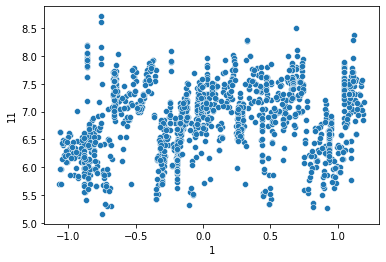

In [40]:
sns.scatterplot(kp[1],kp[11])

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='10', ylabel='11'>

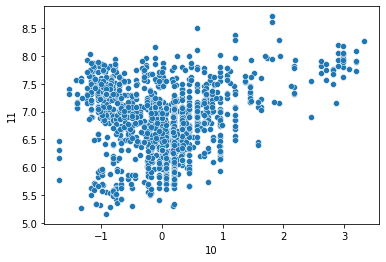

In [41]:
sns.scatterplot(kp[10],kp[11])

* Above scatter plot shows data is linear.
* Assumption 1st satisfied.

## Pair plot

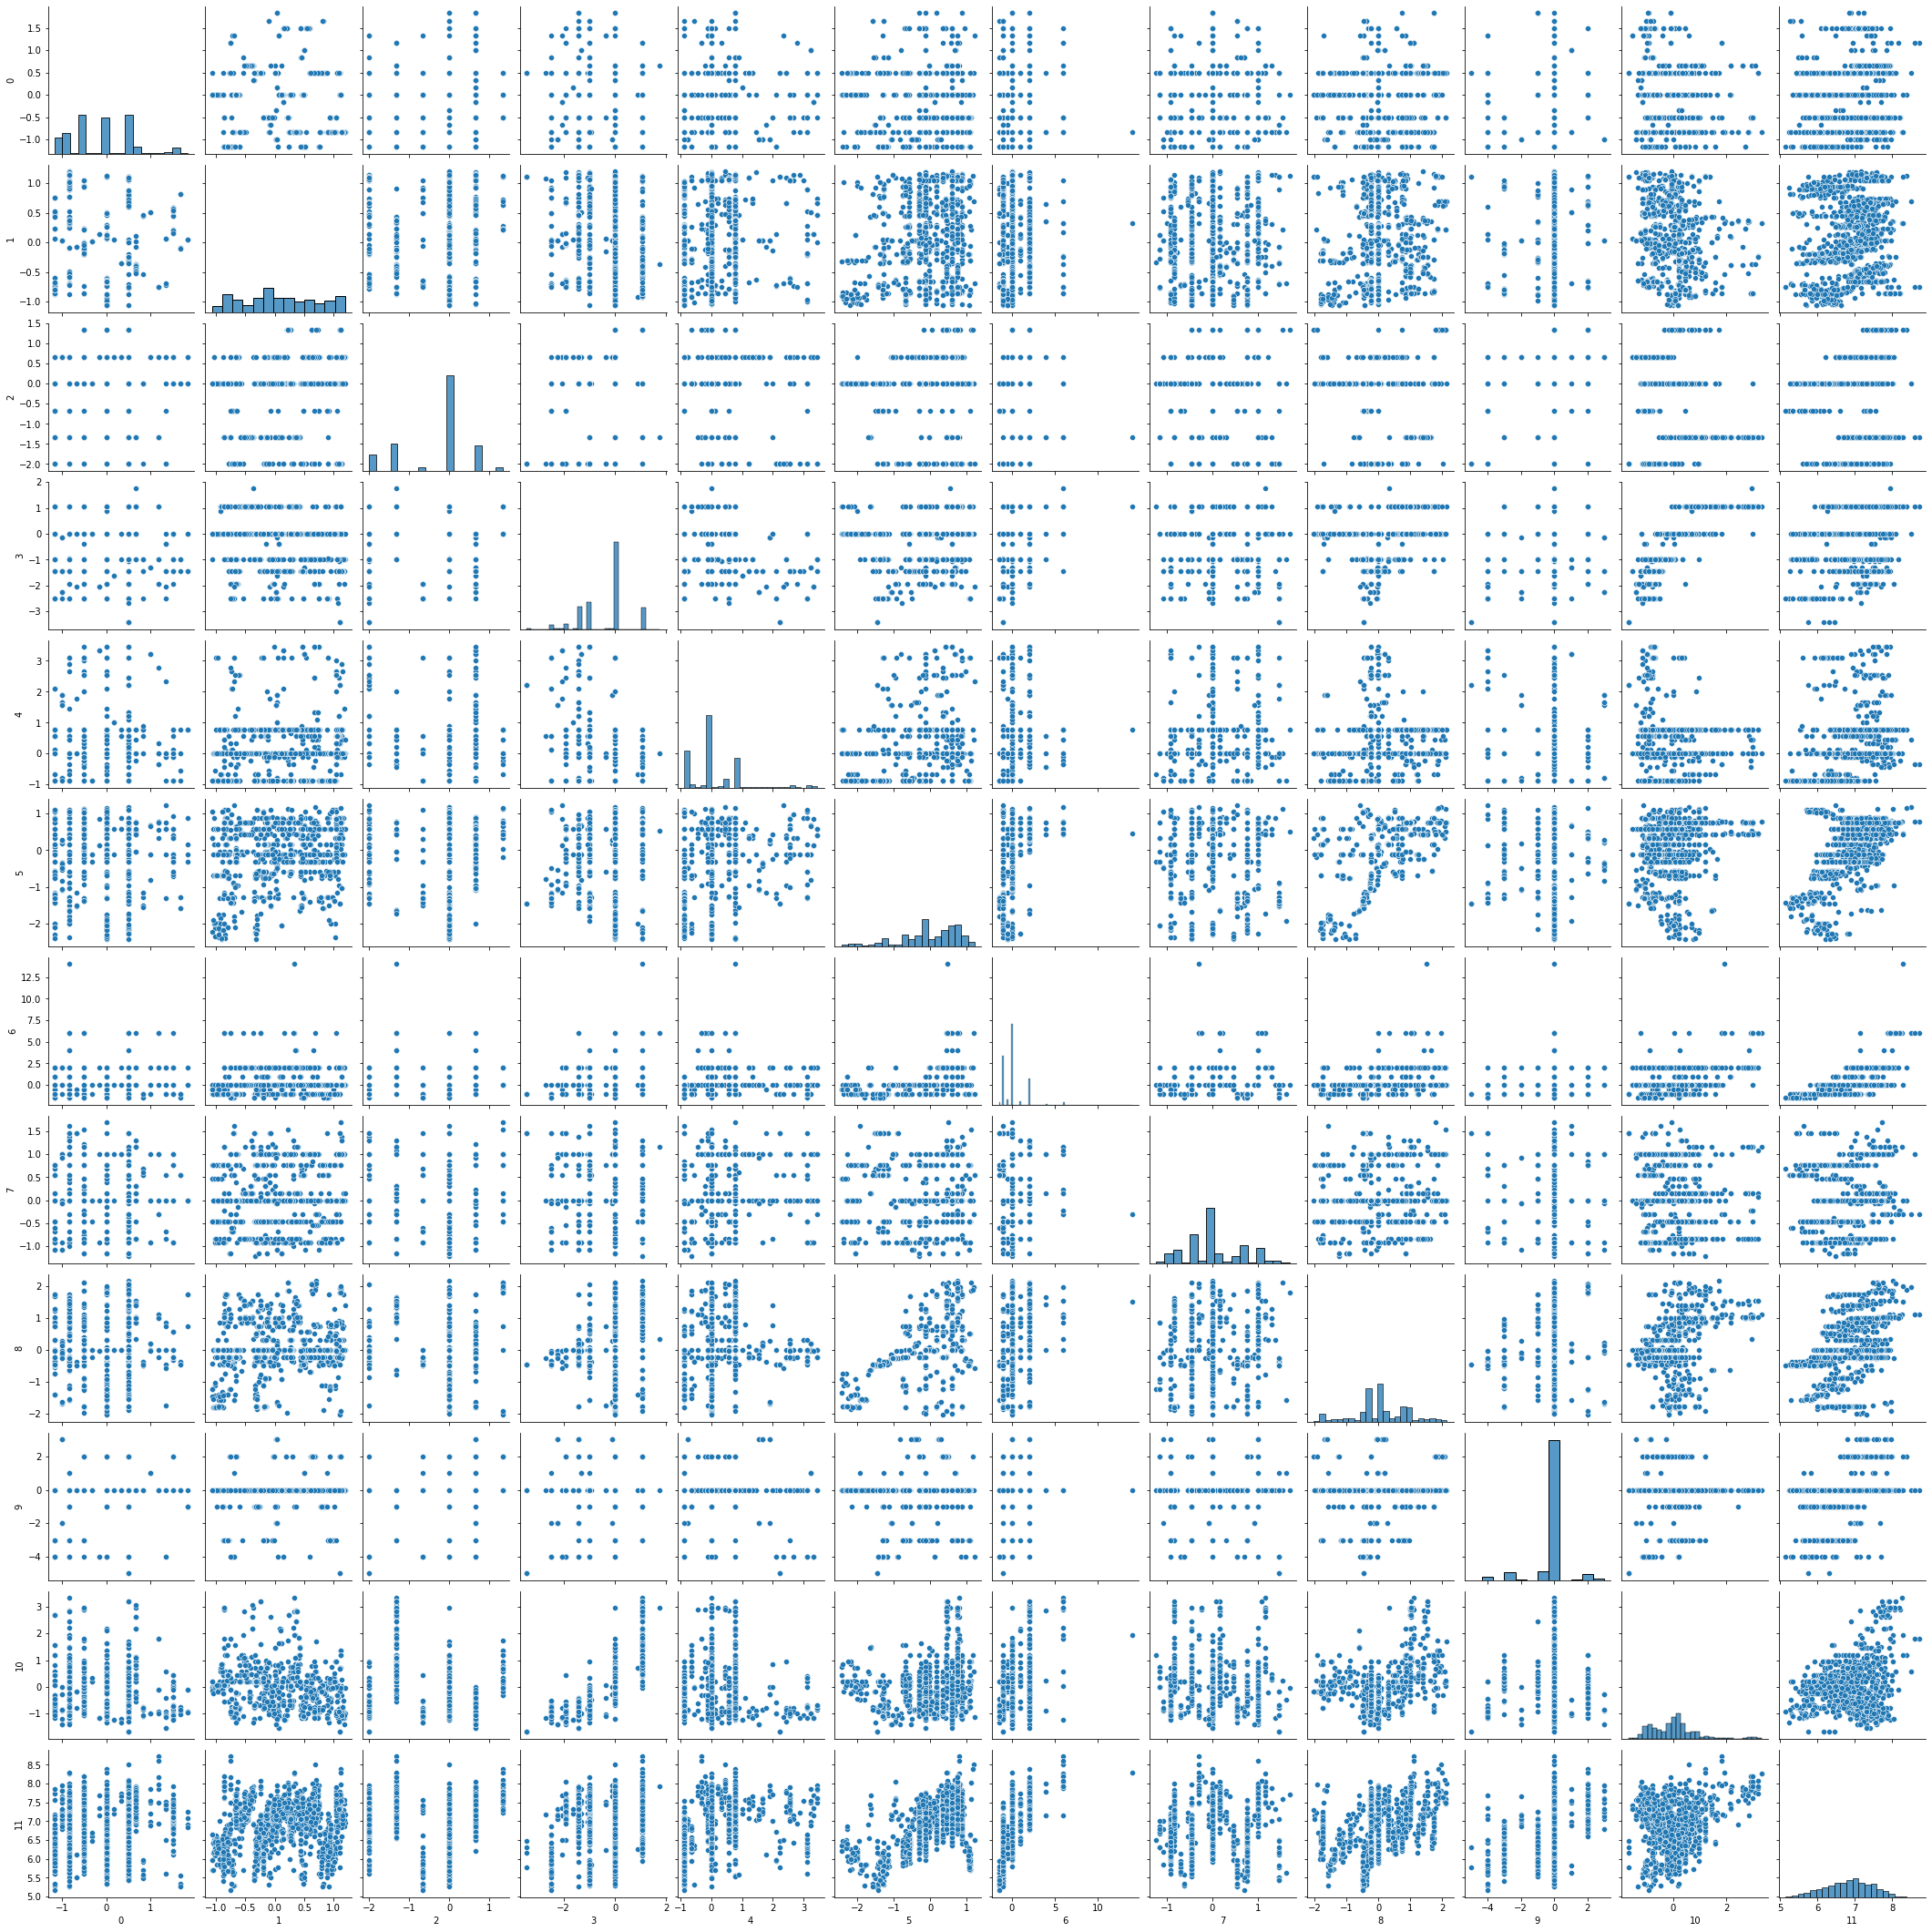

In [42]:
sns.pairplot(kp)
plt.show()

## 2) Check Multicollinearity

* Range of Multicollinearity.


* if   vif   >  5   ==>      Multicollinearity.

* if   1 <   vif   <   5   ==> Less collinearity

* if   vif   = 1   ==>        No collinearity

In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
{kp.columns[i]:variance_inflation_factor(kp.values,i)
for i in range (1,kp.shape[1])}

{1: 1.161749797485454,
 2: 1.3579361823613185,
 3: 4.30974752633874,
 4: 1.2917625832843596,
 5: 1.5731335648966245,
 6: 1.71000463113633,
 7: 1.1106514868753024,
 8: 1.5178433713104238,
 9: 1.1054432499916966,
 10: 4.373663143684039,
 11: 1.6146445344579083}

* In above result we can seen that their is no collinearity or less collinearity between columns.

* Assumption 2nd Satisfied.

## Assumption 3 :- Error Should be normally distributed with N(0,1).

### Non- Normalised Data

In [44]:
ind_data=data.iloc[:,:-1]
dep_data=data.iloc[:,-1]

In [45]:
x_train,x_test,y_train,y_test=train_test_split(ind_data,dep_data,test_size=0.2,random_state=1)

In [46]:
l1=LinearRegression()
L1=l1.fit(x_train,y_train)

In [47]:
y_pred=l1.predict(x_test)

In [48]:
err=y_test-y_pred

### Normalised data

In [49]:
ind_data=kp.iloc[:,:-1]
dep_data=kp.iloc[:,-1]

In [50]:
dep_data

0       7.200194
1       6.801216
2       6.354370
3       7.838915
4       7.497540
          ...   
1298    6.458338
1299    7.312553
1300    5.433722
1301    6.638568
1302    5.910797
Name: 11, Length: 1303, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind_data,dep_data,test_size=0.2,random_state=1)

In [52]:
from sklearn.linear_model import LinearRegression
l1=LinearRegression()
L1=l1.fit(x_train,y_train)

In [53]:
y_pred1=l1.predict(x_test)

In [54]:
err1=y_test-y_pred1

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


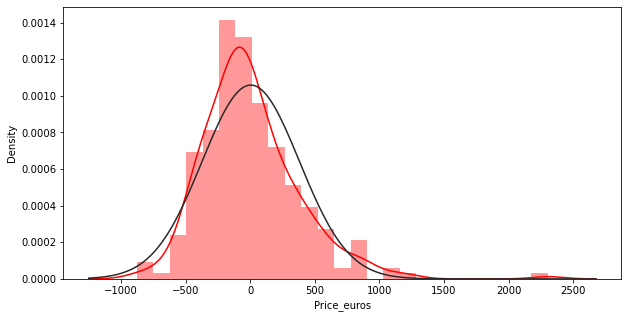

In [55]:
plt.figure(figsize=(10,5))
sns.distplot(err,fit=norm,color="red")
plt.show()

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


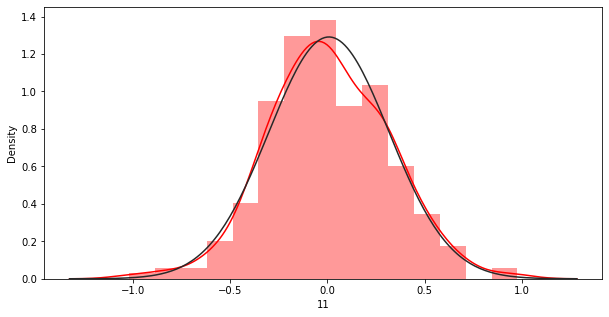

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(err1,fit=norm,color="red")
plt.show()

## Distibution of the errors.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


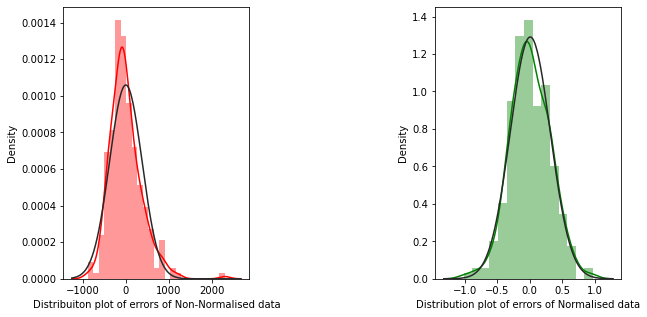

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=1, wspace=1)
sns.distplot(err,fit=norm,color="red")
plt.xlabel("Distribuiton plot of errors of Non-Normalised data")
plt.subplot(1,2,2)
sns.distplot(err1,fit=norm,color="green")
plt.xlabel("Distribution plot of errors of Normalised data")
plt.plot()
plt.show()

* Distribution of the errors is normal i.e. N(0,1)

## Assumption 4 :- No Autocorrelation

### Non Normalised data

Text(0.5, 0, 'Autocorrelation plot of Non-Normalised data')

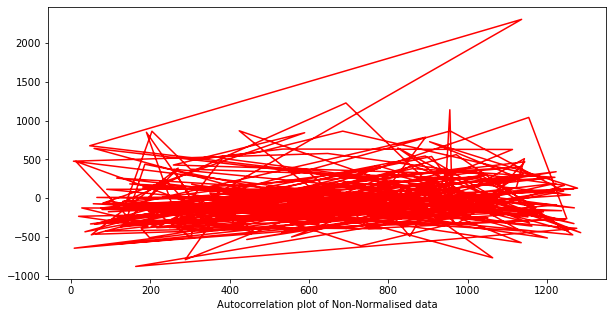

In [58]:
plt.figure(figsize=(10,5))
plt.plot(err,color="red")
plt.xlabel("Autocorrelation plot of Non-Normalised data")

### Normalised data

Text(0.5, 0, 'Autocorrelation plot of Normalised data')

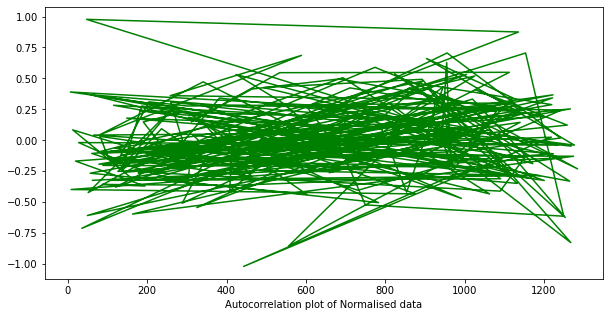

In [59]:
plt.figure(figsize=(10,5))
plt.plot(err1,color="green")
plt.xlabel("Autocorrelation plot of Normalised data")

* There is no autocorrelation in the errors.
* All Assumptions are satisfied.

### Then we can say that given data is best fitted for linear regression.

## Check Performance Matrix

### Non-Normalised data

In [60]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

1669490.277839535


In [61]:
from sklearn.metrics import r2_score
a=r2_score(y_test,y_pred)
print(a)

-4558363.394520815


### Normalised data

In [62]:
# Mean squared error
from sklearn.metrics import mean_squared_error
mse1=mean_squared_error(y_test,y_pred1)
print(mse1)

0.09558193921959059


In [63]:
from sklearn.metrics import r2_score
a1=r2_score(y_test,y_pred1)*100
print("R2 score of the model",a1,"%")

R2 score of the model 73.90237521708336 %


## Result:- 
* The error for normalised data is very low and r2_score is high as compared to non normal data.
* We can seen that the error is too much high when the data is non normal and r2_score is also low. 

## Visualization of Actual value against predicted value

In [64]:
df=pd.DataFrame({"Actual_Value":y_test,"Predicted_Value":y_pred1})
df

,Actual_Value,Predicted_Value
644,6.109248,6.229357
1275,6.591674,6.720446
163,6.983790,7.579605
1008,6.955840,6.900597
909,7.549083,7.132573
...,...,...
1112,6.061457,6.336784
893,7.494986,7.002098
493,6.361302,5.935047
1245,7.377759,7.519128


C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual_Value', ylabel='Predicted_Value'>

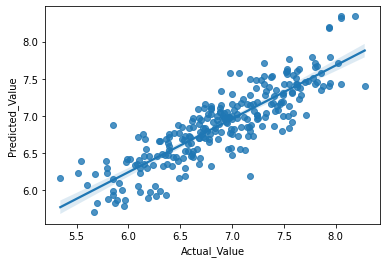

In [65]:
sns.regplot("Actual_Value","Predicted_Value",data=df)

In [66]:
L1.coef_

array([ 0.05659862,  0.03471155,  0.04172924, -0.0693697 ,  0.1007623 ,
        0.26733393,  0.22207387,  0.00898821,  0.0699893 ,  0.11134818,
        0.00880573])

In [67]:
L1.intercept_

6.816948771527513

## Comparison of Non-normal data & Normal data

## 1) Comparison of Errors.

C:\Users\ARJUN SALUNKHE\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


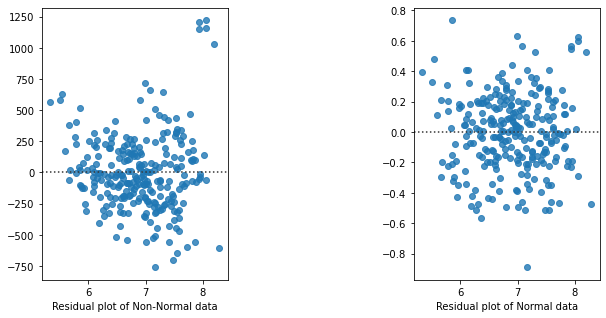

In [68]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=1, wspace=1)
sns.residplot(y_test,y_pred)
plt.xlabel("Residual plot of Non-Normal data")
plt.subplot(1,2,2)
sns.residplot(y_test,y_pred1)
plt.xlabel("Residual plot of Normal data")
plt.plot()
plt.show()

* Residuals range in non normalised data is very high .
* Residuals range in normalised data is follows the range between 0 to 1 .

## 2) Comparison of Autocorrelation

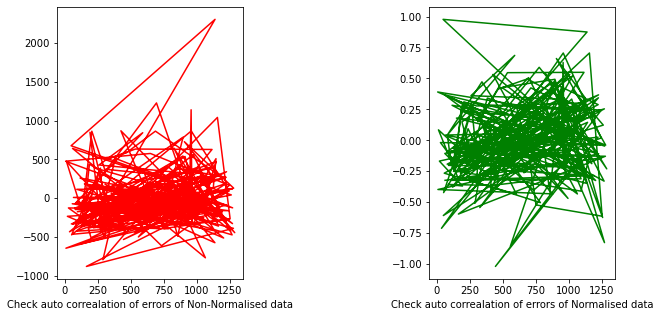

In [69]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.subplots_adjust(hspace=1, wspace=1)
plt.plot(err,color="red")
plt.xlabel("Check auto correalation of errors of Non-Normalised data")
plt.subplot(1,2,2)
plt.plot(err1,color="green")
plt.xlabel("Check auto correalation of errors of Normalised data")
plt.plot()
plt.show()

* There is no autocorrelation in errors of Non-Normalised and normalised data.